In [1]:
import abacus_cosmos.Halos as ach
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import glob
from collections import Counter
%matplotlib inline

In [2]:
np.__version__

'1.15.4'

In [17]:
def entropy_beta_file(filename):
    # remove duplicates
    beta_data = np.sort(np.int_(np.loadtxt(filename)))
    #print(len(beta_data))
    beta_data  = np.unique(beta_data, axis=0)
    beta_data = beta_data.flatten()
    #print(len(beta_data))
    beta_link_count = Counter(Counter(beta_data).values())

    proba = []
    total_link = np.sum(list(beta_link_count.values()))
    for k in beta_link_count:
        print(k, beta_link_count[k]/total_link)
        proba.append(beta_link_count[k]/total_link)
    proba = np.array(proba)
    print(proba)
    entropy = np.sum(-proba*np.log(proba))
    return entropy


In [4]:
halo_data = ach.read_halos_FoF("../data/AbacusCosmos_1100box_00_FoF_halos_z0.300/")

In [5]:
halo_table = Table(halo_data)

In [4]:
halo_table[:1]

id,subsamp_start,subsamp_len,N,subhalo_N [4],pos [3],vel [3],sigma_v [3],r25,r50,r75,r90,vcirc_max,rvcirc_max,subhalo_pos [3],subhalo_vel [3],subhalo_sigma_v [3],subhalo_r25,subhalo_r50,subhalo_r75,subhalo_r90,subhalo_vcirc_max,subhalo_rvcirc_max
int64,uint64,uint32,uint32,uint32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
33242377525485,0,2701,27838,10581 .. 586,-498.60577 .. 409.212,184.10143 .. -221.06378,1103.6188 .. 784.6088,1.6821681,2.0619814,2.773661,3.4043431,1268.671,2.4715793,-499.46762 .. 409.26157,314.42062 .. -41.576843,1304.2107 .. 787.263,0.7284749,1.6034807,4.082432,5.2991858,1444.855,1.0359467


In [11]:
print(len(halo_table))

6376922


In [12]:
sigma_v = halo_data['vcirc_max']
print(min(sigma_v))

87.371994


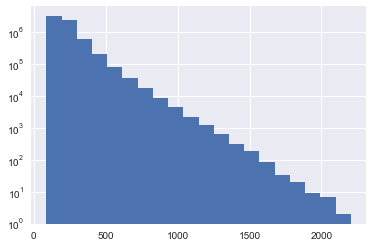

In [53]:
_ = plt.hist(sigma_v, log=True, bins=20)

In [14]:
np.count_nonzero(sigma_v>300)

914640

In [30]:
ii = (sigma_v>200)
pos_high_mass = halo_data['pos'][ii]
sigma_v_high = sigma_v[ii]

In [17]:
pos_high_mass

array([[-498.60577,  530.043  ,  409.212  ],
       [-348.728  ,  532.7601 ,  118.81715],
       [-451.55487,  542.8891 , -500.8309 ],
       ...,
       [ 488.64554, -377.45413, -302.85175],
       [ 383.27612, -394.918  , -339.76508],
       [ 334.3979 , -398.67795,  224.76846]], dtype=float32)

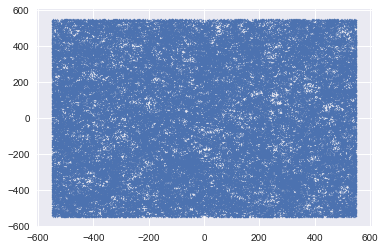

In [20]:
ii = pos_high_mass[:,2]>450
plt.scatter(pos_high_mass[ii,0], pos_high_mass[ii,1], alpha=0.5, s=1.0)
#plt.xlim([0,200])
#plt.ylim([0,200])

In [54]:
delta_center = 200
radius = 100
cut =0 
for center_i in [-2,-1,0,1,2]:
    for center_j in [-2,-1,0,1,2]:
        for center_k in [-2,-1,0,1,2]:
            center_x = center_i * delta_center
            center_y = center_j * delta_center
            center_z = center_k * delta_center
            r = np.sqrt((pos_high_mass[:,0]-center_x)**2 + (pos_high_mass[:,1]-center_y)**2 + (pos_high_mass[:,2]-center_z)**2)
            #ll = (r>radius) & (r<radius+10)
            ll = r<radius
            pos_sphere = np.zeros((len(pos_high_mass[ll]),3))
            pos_sphere[:,0] = pos_high_mass[ll,0]
            pos_sphere[:,1] = pos_high_mass[ll,1]
            pos_sphere[:,2] = pos_high_mass[ll,2]
            #pos_sphere[:,3] = sigma_v_high[ll]
            #pos_sphere = np.vstack([pos_high_mass[ll],sigma_v_high[ll]])
            print(center_i, center_j, center_k, len(pos_sphere))
            np.savetxt("../data/AbacusCosmos_1100box_00_FoF_halos_z0.300/cuts/sphere_data_cut_{}.dat".format(cut), pos_sphere)
            
            ll = (r<radius) & (r>(radius-10))
            pos_sphere = np.zeros((len(pos_high_mass[ll]),3))
            pos_sphere[:,0] = pos_high_mass[ll,0]
            pos_sphere[:,1] = pos_high_mass[ll,1]
            pos_sphere[:,2] = pos_high_mass[ll,2]
            #pos_sphere[:,3] = sigma_v_high[ll]
            print(center_i, center_j, center_k, len(pos_shell))
            np.savetxt("../data/AbacusCosmos_1100box_00_FoF_halos_z0.300/cuts/shell_data_cut_{}.dat".format(cut), pos_sphere)
            
            cut += 1

-2 -2 -2 9989
-2 -2 -2 2677
-2 -2 -1 9039
-2 -2 -1 2677
-2 -2 0 9962
-2 -2 0 2677
-2 -2 1 9701
-2 -2 1 2677
-2 -2 2 9691
-2 -2 2 2677
-2 -1 -2 9287
-2 -1 -2 2677
-2 -1 -1 9598
-2 -1 -1 2677
-2 -1 0 10250
-2 -1 0 2677
-2 -1 1 9507
-2 -1 1 2677
-2 -1 2 9746
-2 -1 2 2677
-2 0 -2 10635
-2 0 -2 2677
-2 0 -1 10186
-2 0 -1 2677
-2 0 0 9946
-2 0 0 2677
-2 0 1 9115
-2 0 1 2677
-2 0 2 9385
-2 0 2 2677
-2 1 -2 9003
-2 1 -2 2677
-2 1 -1 9889
-2 1 -1 2677
-2 1 0 10770
-2 1 0 2677
-2 1 1 9537
-2 1 1 2677
-2 1 2 9219
-2 1 2 2677
-2 2 -2 9718
-2 2 -2 2677
-2 2 -1 9239
-2 2 -1 2677
-2 2 0 8835
-2 2 0 2677
-2 2 1 9048
-2 2 1 2677
-2 2 2 9781
-2 2 2 2677
-1 -2 -2 8858
-1 -2 -2 2677
-1 -2 -1 8170
-1 -2 -1 2677
-1 -2 0 8815
-1 -2 0 2677
-1 -2 1 8553
-1 -2 1 2677
-1 -2 2 9396
-1 -2 2 2677
-1 -1 -2 9380
-1 -1 -2 2677
-1 -1 -1 8628
-1 -1 -1 2677
-1 -1 0 9410
-1 -1 0 2677
-1 -1 1 9790
-1 -1 1 2677
-1 -1 2 8991
-1 -1 2 2677
-1 0 -2 10141
-1 0 -2 2677
-1 0 -1 9157
-1 0 -1 2677
-1 0 0 10076
-1 0 0 2677
-1 0 1 862

In [6]:
betas = [1.0, 2.0, 3.0, 4.0, 7.0, 10.0]
cut = "shell"
n_cut = 0

for beta in betas:
    data_path = "../data/AbacusCosmos_1100box_00_FoF_halos_z0.300/cuts/"
    output = "{}/beta_{}_data_cut_{:d}_beta_{:.1f}.dat ".format(data_path, cut, n_cut, beta)
    comm = "/Users/forero/Applications/ngl-beta/build/binsrc/./getNeighborGraph "
    comm += " -i ../data/AbacusCosmos_1100box_00_FoF_halos_z0.300/cuts/{}_data_cut_0.dat".format(cut)
    comm += " -d 3"
    comm += " -b {}".format(beta)
    comm += " > {} &".format(output)
    print(comm)
    #! $comm
#!ls 

/Users/forero/Applications/ngl-beta/build/binsrc/./getNeighborGraph  -i ../data/AbacusCosmos_1100box_00_FoF_halos_z0.300/cuts/shell_data_cut_0.dat -d 3 -b 1.0 > ../data/AbacusCosmos_1100box_00_FoF_halos_z0.300/cuts//beta_shell_data_cut_0_beta_1.0.dat  &
/Users/forero/Applications/ngl-beta/build/binsrc/./getNeighborGraph  -i ../data/AbacusCosmos_1100box_00_FoF_halos_z0.300/cuts/shell_data_cut_0.dat -d 3 -b 2.0 > ../data/AbacusCosmos_1100box_00_FoF_halos_z0.300/cuts//beta_shell_data_cut_0_beta_2.0.dat  &
/Users/forero/Applications/ngl-beta/build/binsrc/./getNeighborGraph  -i ../data/AbacusCosmos_1100box_00_FoF_halos_z0.300/cuts/shell_data_cut_0.dat -d 3 -b 3.0 > ../data/AbacusCosmos_1100box_00_FoF_halos_z0.300/cuts//beta_shell_data_cut_0_beta_3.0.dat  &
/Users/forero/Applications/ngl-beta/build/binsrc/./getNeighborGraph  -i ../data/AbacusCosmos_1100box_00_FoF_halos_z0.300/cuts/shell_data_cut_0.dat -d 3 -b 4.0 > ../data/AbacusCosmos_1100box_00_FoF_halos_z0.300/cuts//beta_shell_data_cut_0_

In [7]:
betas = [1.0, 2.0, 3.0, 4.0, 7.0, 10.0]
cut = "sphere"
n_cut = 0

for beta in betas:
    data_path = "../data/AbacusCosmos_1100box_00_FoF_halos_z0.300/cuts/"
    output = "{}/beta_{}_data_cut_{:d}_beta_{:.1f}.dat ".format(data_path, cut, n_cut, beta)
    comm = "/Users/forero/Applications/ngl-beta/build/binsrc/./getNeighborGraph "
    comm += " -i ../data/AbacusCosmos_1100box_00_FoF_halos_z0.300/cuts/{}_data_cut_0.dat".format(cut)
    comm += " -d 3"
    comm += " -b {}".format(beta)
    comm += " > {} &".format(output)
    print(comm)
    #! $comm
#!ls 

/Users/forero/Applications/ngl-beta/build/binsrc/./getNeighborGraph  -i ../data/AbacusCosmos_1100box_00_FoF_halos_z0.300/cuts/sphere_data_cut_0.dat -d 3 -b 1.0 > ../data/AbacusCosmos_1100box_00_FoF_halos_z0.300/cuts//beta_sphere_data_cut_0_beta_1.0.dat  &
/Users/forero/Applications/ngl-beta/build/binsrc/./getNeighborGraph  -i ../data/AbacusCosmos_1100box_00_FoF_halos_z0.300/cuts/sphere_data_cut_0.dat -d 3 -b 2.0 > ../data/AbacusCosmos_1100box_00_FoF_halos_z0.300/cuts//beta_sphere_data_cut_0_beta_2.0.dat  &
/Users/forero/Applications/ngl-beta/build/binsrc/./getNeighborGraph  -i ../data/AbacusCosmos_1100box_00_FoF_halos_z0.300/cuts/sphere_data_cut_0.dat -d 3 -b 3.0 > ../data/AbacusCosmos_1100box_00_FoF_halos_z0.300/cuts//beta_sphere_data_cut_0_beta_3.0.dat  &
/Users/forero/Applications/ngl-beta/build/binsrc/./getNeighborGraph  -i ../data/AbacusCosmos_1100box_00_FoF_halos_z0.300/cuts/sphere_data_cut_0.dat -d 3 -b 4.0 > ../data/AbacusCosmos_1100box_00_FoF_halos_z0.300/cuts//beta_sphere_dat

In [19]:
betas = [1.0, 2.0, 3.0, 4.0, 7.0, 10.0]
cut = "shell"
data_path = "../data/AbacusCosmos_1100box_00_FoF_halos_z0.300/cuts/"
entropy_shell = []
n_cut = 0
for beta in betas:
    filename = "{}/beta_{}_data_cut_{:d}_beta_{:.1f}.dat".format(data_path, cut, n_cut, beta)
    entropy_shell.append(entropy_beta_file(filename))
    
    
betas_sphere = [0.5, 1.0, 2.0, 3.0, 6.0]
cut = "sphere"
data_path = "../data/AbacusCosmos_1100box_00_FoF_halos_z0.300/cuts/"
entropy_sphere = []
n_cut = 0
#for beta in betas_sphere:
#    filename = "{}/beta_{}_data_cut_{:d}_beta_{:.1f}.dat".format(data_path, cut, n_cut, beta)
#    print(filename)
#    entropy_sphere.append(entropy_beta_file(filename))

6 0.10980392156862745
7 0.04588235294117647
5 0.20666666666666667
4 0.2945098039215686
3 0.23686274509803923
9 0.003137254901960784
2 0.07725490196078431
8 0.02
1 0.004705882352941176
10 0.000784313725490196
12 0.000392156862745098
[0.10980392 0.04588235 0.20666667 0.2945098  0.23686275 0.00313725
 0.0772549  0.02       0.00470588 0.00078431 0.00039216]
3 0.35764705882352943
4 0.054901960784313725
1 0.08549019607843138
2 0.5003921568627451
5 0.001568627450980392
[0.35764706 0.05490196 0.0854902  0.50039216 0.00156863]
3 0.17153284671532848
1 0.2798053527980535
2 0.5364963503649635
4 0.011759935117599351
5 0.00040551500405515005
[1.71532847e-01 2.79805353e-01 5.36496350e-01 1.17599351e-02
 4.05515004e-04]
2 0.4841609589041096
1 0.4019691780821918
3 0.11044520547945205
4 0.0029965753424657533
5 0.0004280821917808219
[4.84160959e-01 4.01969178e-01 1.10445205e-01 2.99657534e-03
 4.28082192e-04]
1 0.5638613861386138
3 0.04801980198019802
2 0.38663366336633664
4 0.0014851485148514852
[0.5638

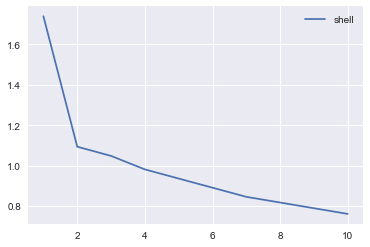

In [18]:
plt.plot(betas, entropy_shell, label='shell')
#plt.plot(betas_sphere, entropy_sphere, label='sphere')
plt.legend()
#plt.loglog()

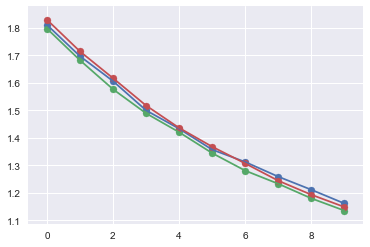

In [171]:
entropy = np.loadtxt("entropy.txt")
plt.plot(range(0,10), entropy)
plt.scatter(range(0,10), entropy)

entropy0 = np.loadtxt("entropy_box_0.txt")
plt.plot(range(0,10), entropy0)
plt.scatter(range(0,10), entropy0)

entropy9 = np.loadtxt("entropy_box_9.txt")
plt.plot(range(0,10), entropy9)
plt.scatter(range(0,10), entropy9)